In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_data = pd.read_csv('./data/crime.csv')
crime_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [5]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
IncidntNum,150500.0,1.616440e+08,5.535976e+06,1.135121e+07,1.603283e+08,1.606541e+08,1.609764e+08,9.910090e+08
X,150500.0,-1.224236e+02,2.621030e-02,-1.225136e+02,-1.224340e+02,-1.224169e+02,-1.224066e+02,-1.223656e+02
Y,150500.0,3.776892e+01,2.363715e-02,3.770792e+01,3.775649e+01,3.777542e+01,3.778506e+01,3.781998e+01
PdId,150500.0,1.616440e+13,5.535976e+11,1.135121e+12,1.603283e+13,1.606541e+13,1.609764e+13,9.910090e+13


In [ ]:
crime_data.isnull().sum()

In [ ]:
crime_data['PdDistrict'].fillna(crime_data['PdDistrict'].mode()[0], inplace=True)

In [ ]:
crime_data.isnull().any()

In [6]:
num_cols = crime_data.select_dtypes(include=['int', 'float']).columns
cat_cols = crime_data.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['IncidntNum', 'X', 'Y', 'PdId'], dtype='object')
Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'Location'],
      dtype='object')


In [54]:
print("Printing no of unique values of categorical column and its first five records:")

for i, j in enumerate(cat_cols):
    print("####"*20)
    print(f"\nNo of unique values of {j} column : { len(crime_data[j].unique()) } \n\n", crime_data[j].unique()[:5])

Printing no of unique values of categorical column and its first five records:
################################################################################

No of unique values of Category column : 39 

 ['WEAPON LAWS' 'WARRANTS' 'NON-CRIMINAL' 'ASSAULT' 'OTHER OFFENSES']
################################################################################

No of unique values of Descript column : 726 

 ['POSS OF PROHIBITED WEAPON'
 'FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE' 'WARRANT ARREST'
 'LOST PROPERTY' 'BATTERY']
################################################################################

No of unique values of DayOfWeek column : 7 

 ['Friday' 'Monday' 'Tuesday' 'Saturday' 'Thursday']
################################################################################

No of unique values of Date column : 366 

 ['01/29/2016 12:00:00 AM' '04/25/2016 12:00:00 AM'
 '01/05/2016 12:00:00 AM' '01/01/2016 12:00:00 AM'
 '01/02/2016 12:00:00 AM']
#################################

In [20]:
crime_data['Category'].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

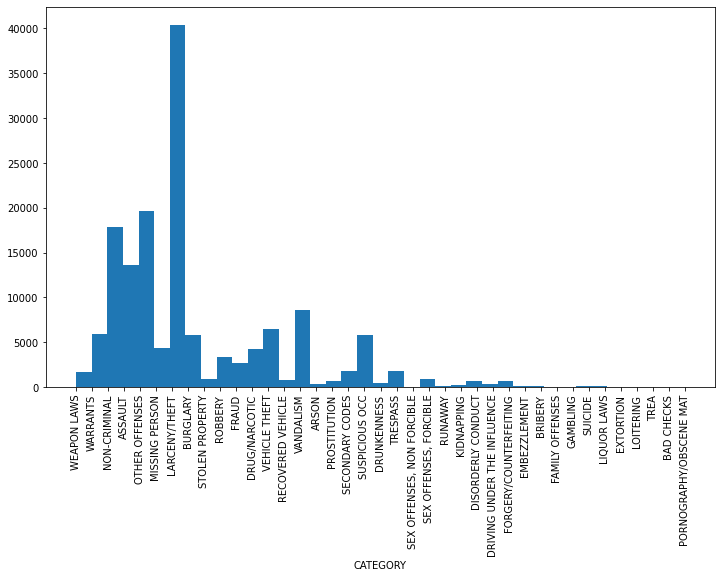

In [25]:
plt.figure(figsize=(12,7))
plt.hist("Category", bins=len(crime_data['Category'].unique()),  data=crime_data)
plt.xlabel("CATEGORY")
plt.xticks(rotation=90)
plt.title()
plt.show()

C:\Users\johny\.conda\envs\trad_mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


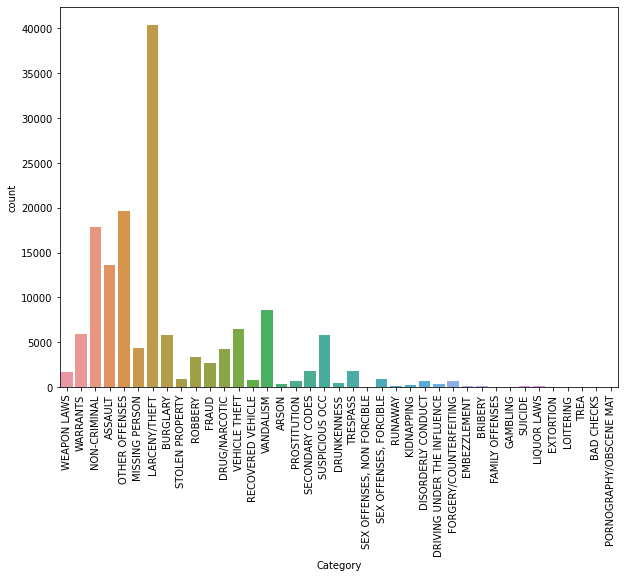

In [36]:
plt.figure(figsize=(10,7))
sns.countplot("Category", data=crime_data)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Treemap showing Categories')

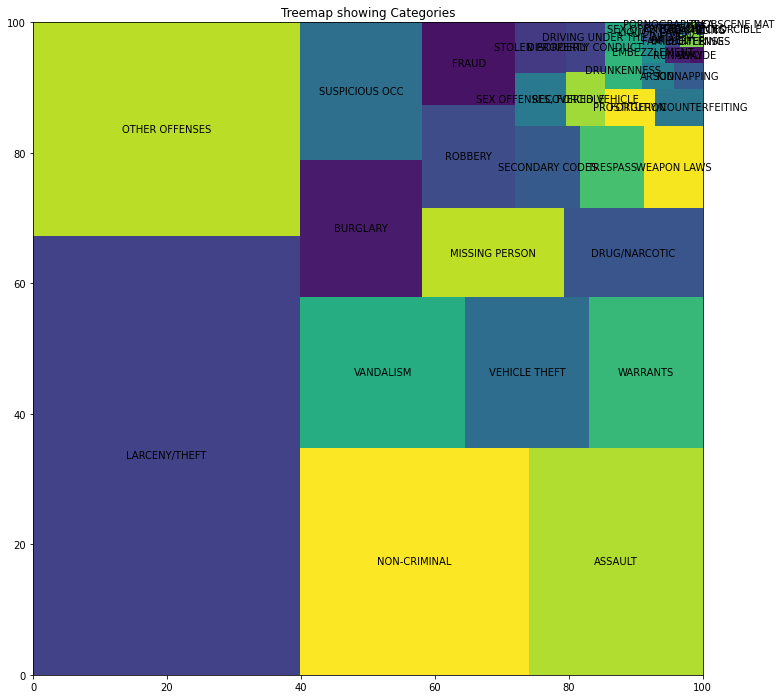

In [40]:
import squarify

cat_vc = crime_data['Category'].value_counts()
plt.figure(figsize=(12,12))
squarify.plot(sizes= cat_vc.values, label=cat_vc.index)
plt.title("Treemap showing Categories")

### __FINDING THE MOST FREQUENT WORDS FROM THE DESCRIPTION COLUMN BY THEIR SIZE USING WORDCLOUD LIBRARY__

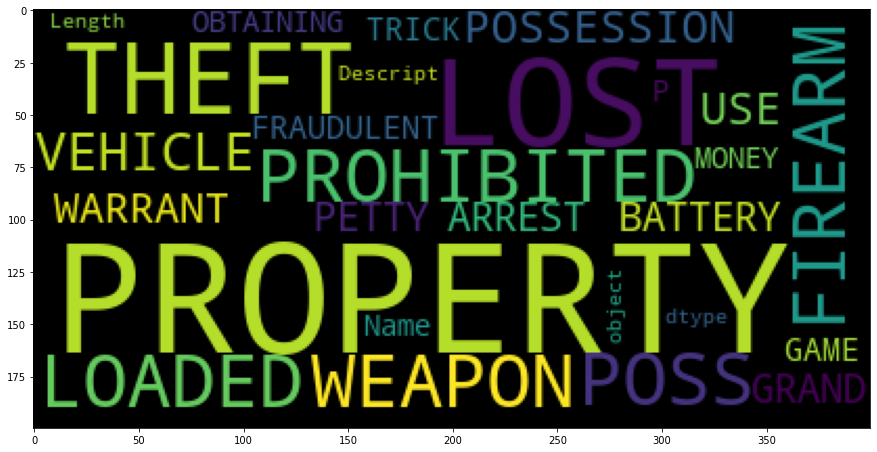

In [44]:
from wordcloud import WordCloud

wc = WordCloud().generate(str(crime_data['Descript']))
plt.figure(figsize=(15, 15))
plt.imshow(wc)
plt.show()

In [49]:
df = pd.crosstab(crime_data['Category'], crime_data['PdDistrict'])
df = df.div(df.sum(1).astype(float), axis = 0)
df

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ARSON,0.248252,0.101399,0.076923,0.160839,0.094406,0.045455,0.048951,0.115385,0.062937,0.045455
ASSAULT,0.130736,0.087427,0.110923,0.155410,0.113133,0.038595,0.034838,0.173234,0.067614,0.088090
BAD CHECKS,0.117647,0.088235,0.058824,0.058824,0.117647,0.058824,0.147059,0.176471,0.176471,0.000000
BRIBERY,0.303030,0.045455,0.121212,0.151515,0.060606,0.015152,0.030303,0.121212,0.060606,0.090909
BURGLARY,0.089797,0.111169,0.092037,0.136677,0.138401,0.071182,0.068080,0.145122,0.119786,0.027749
DISORDERLY CONDUCT,0.074468,0.048632,0.021277,0.259878,0.188450,0.027356,0.013678,0.215805,0.027356,0.123100
DRIVING UNDER THE INFLUENCE,0.071429,0.082011,0.084656,0.161376,0.108466,0.071429,0.089947,0.174603,0.124339,0.031746
DRUG/NARCOTIC,0.077068,0.048786,0.045015,0.150601,0.124205,0.064577,0.017912,0.217535,0.025454,0.228848
DRUNKENNESS,0.058065,0.111828,0.038710,0.217204,0.126882,0.027957,0.036559,0.189247,0.105376,0.088172


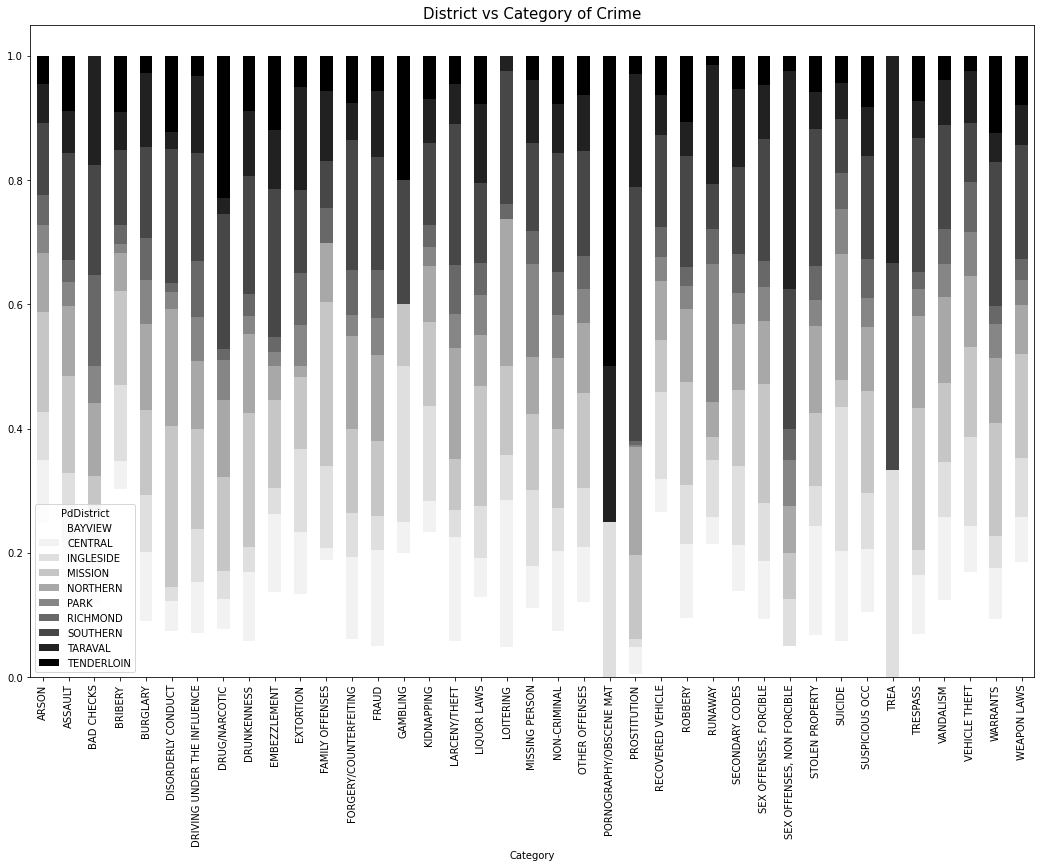

In [53]:
df.plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 20, fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

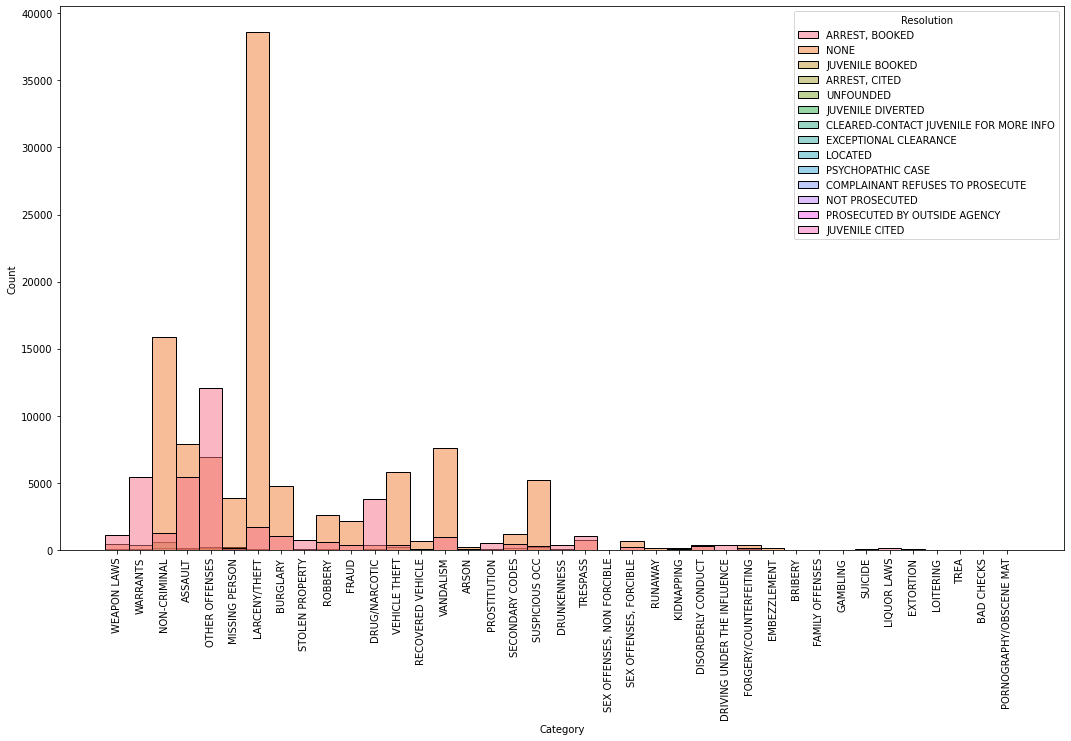

In [73]:
plt.figure(figsize=(18,10))
sns.histplot(data=crime_data, x="Category", stat='count', hue='Resolution', legend=True)
plt.xticks(rotation=90)
plt.show()

In [98]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'])
crime_data['Month'] = crime_data['Date'].dt.month
crime_data['Day'] = crime_data['Date'].dt.day

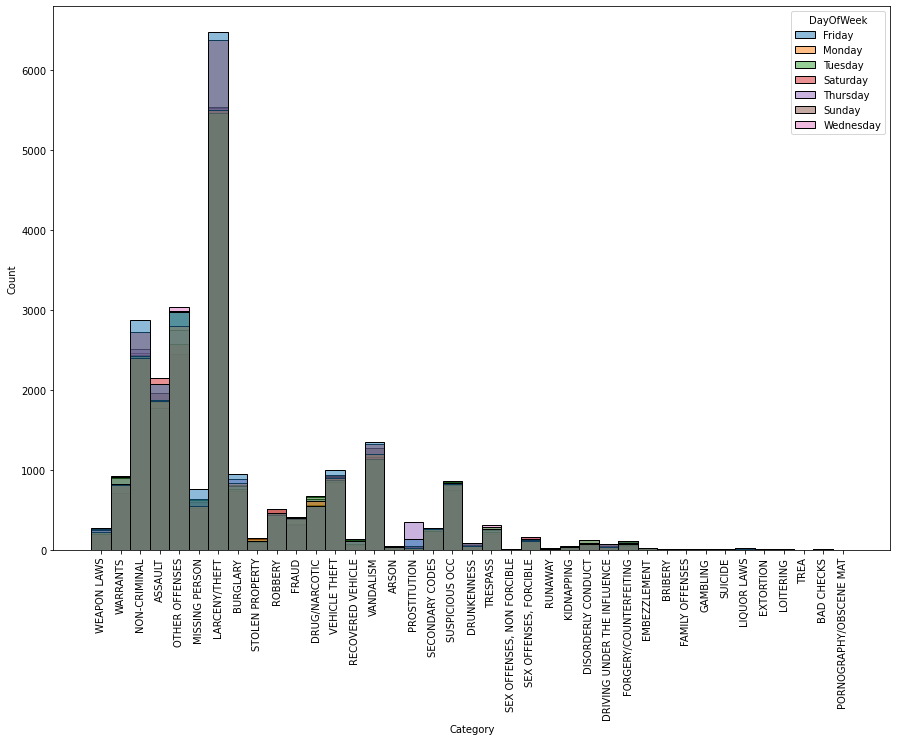

In [106]:
plt.figure(figsize=(15,10))
sns.histplot(data=crime_data, x="Category", stat='count', hue='DayOfWeek', legend=True)
plt.xticks(rotation=90)
plt.show()


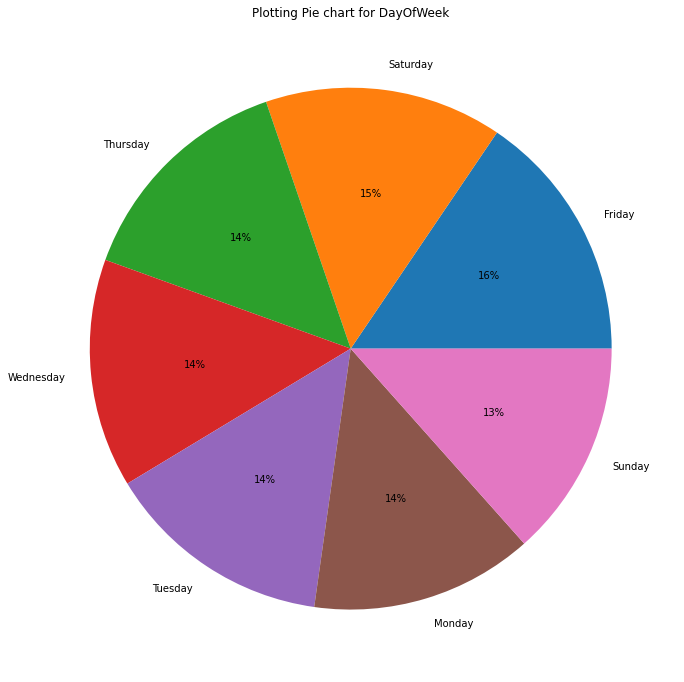

In [116]:
cd_vc = crime_data["DayOfWeek"].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(cd_vc.values, labels=cd_vc.index, autopct='%.0f%%')
plt.title("Plotting Pie chart for DayOfWeek")
plt.show()

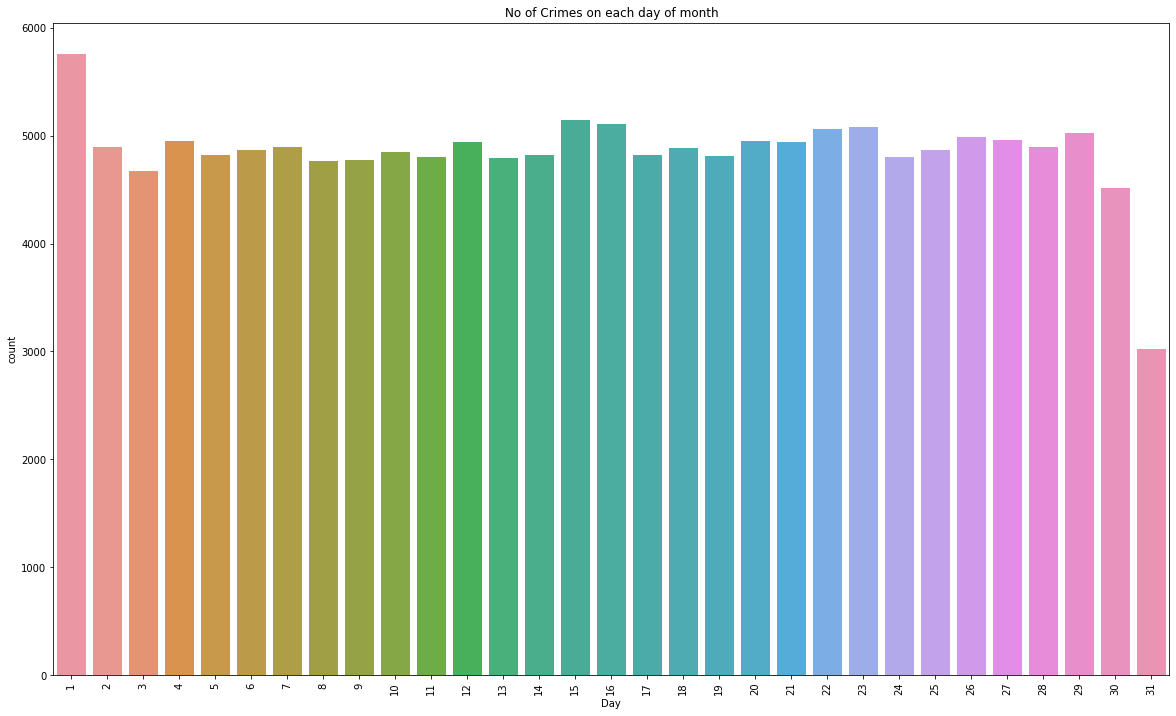

In [123]:
plt.figure(figsize=(20,12))
sns.countplot(x='Day', data=crime_data)
plt.title("No of Crimes on each day of month")
plt.xticks(rotation=90)
plt.show()

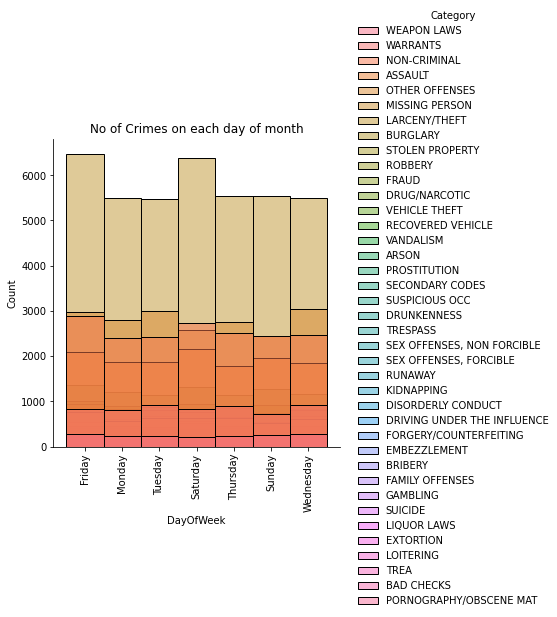

In [131]:
# plt.figure()
sns.displot(x="DayOfWeek", data=crime_data, hue="Category")
plt.title("No of Crimes on each day of month")
plt.xticks(rotation=90)
plt.show()